# EDA

In [1]:
#import all necessary libraries for the project
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import glob
import os
import cv2
from sklearn.svm import SVC
import shutil

In [2]:
# #direct the path to the google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
path = "C:/Users/rak20/Downloads/Final/Capstone_Project/"

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_json(path + 'train.jsonl', lines=True)
dev_seen = pd.read_json(path + 'dev_seen.jsonl', lines=True)
dev_unseen = pd.read_json(path + 'dev_unseen.jsonl', lines=True)
dev_data = pd.concat([dev_seen, dev_unseen])
test_seen = pd.read_json(path + 'test_seen.jsonl', lines=True)
test_unseen = pd.read_json(path + 'test_unseen.jsonl', lines=True)
test_data = pd.concat([test_seen, test_unseen])

In [5]:
print("Train Data:")
print(train_data.info())
print("\nDev Data:")
print(dev_data.info())
print("\nTest Data:")
print(test_data.info())

Train Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      8500 non-null   int64 
 1   img     8500 non-null   object
 2   label   8500 non-null   int64 
 3   text    8500 non-null   object
dtypes: int64(2), object(2)
memory usage: 265.8+ KB
None

Dev Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 539
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1040 non-null   int64 
 1   img     1040 non-null   object
 2   label   1040 non-null   int64 
 3   text    1040 non-null   object
dtypes: int64(2), object(2)
memory usage: 40.6+ KB
None

Test Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3000 non-null   in

In [6]:

# Step 3: Handle Missing Values (if any)
print("Missing Values in Train Data:")
print(train_data.isnull().sum())
print("\nMissing Values in Dev Data:")
print(dev_data.isnull().sum())
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())

Missing Values in Train Data:
id       0
img      0
label    0
text     0
dtype: int64

Missing Values in Dev Data:
id       0
img      0
label    0
text     0
dtype: int64

Missing Values in Test Data:
id       0
img      0
label    0
text     0
dtype: int64


In [7]:
# Step 4: Data Types
print("Data Types in Train Data:")
print(train_data.dtypes)
print("\nData Types in Dev Data:")
print(dev_data.dtypes)
print("\nData Types in Test Data:")
print(test_data.dtypes)

Data Types in Train Data:
id        int64
img      object
label     int64
text     object
dtype: object

Data Types in Dev Data:
id        int64
img      object
label     int64
text     object
dtype: object

Data Types in Test Data:
id        int64
img      object
label     int64
text     object
dtype: object


In [8]:
# Step 5: Descriptive Statistics
print("Descriptive Statistics for Train Data:")
print(train_data.describe())


Descriptive Statistics for Train Data:
                 id        label
count   8500.000000  8500.000000
mean   50006.595765     0.355176
std    28429.195025     0.478595
min     1235.000000     0.000000
25%    25840.000000     0.000000
50%    49834.000000     0.000000
75%    74332.250000     1.000000
max    98764.000000     1.000000


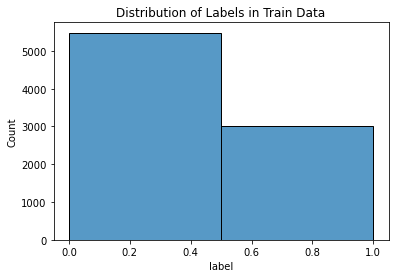

In [9]:
# Step 6: Distribution Analysis
sns.histplot(train_data['label'], bins=2, kde=False)
plt.title('Distribution of Labels in Train Data')
plt.show()

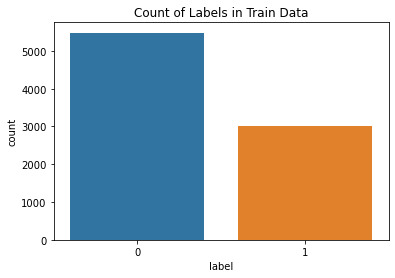

In [10]:
# Step 7: Categorical Variables
sns.countplot(x='label', data=train_data)
plt.title('Count of Labels in Train Data')
plt.show()

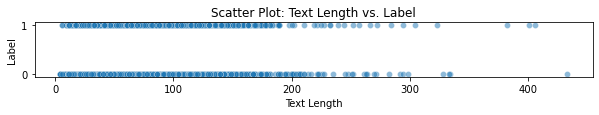

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_data = pd.read_json(path+'train.jsonl', lines=True)

# Calculate text length
train_data['text_length'] = train_data['text'].apply(len)

# Scatter plot to explore the relationship between text length and label
plt.figure(figsize=(10, 1))
sns.scatterplot(x='text_length', y='label', data=train_data, alpha=0.5)
plt.title('Scatter Plot: Text Length vs. Label')
plt.xlabel('Text Length')
plt.ylabel('Label')
plt.show()


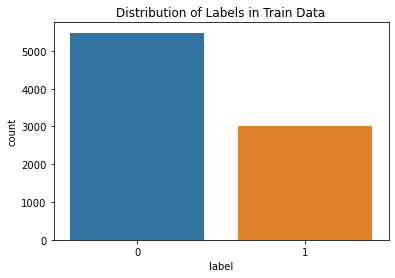

In [12]:
# Step 9: Target Variable Analysis
sns.countplot(x='label', data=train_data)
plt.title('Distribution of Labels in Train Data')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rak20\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


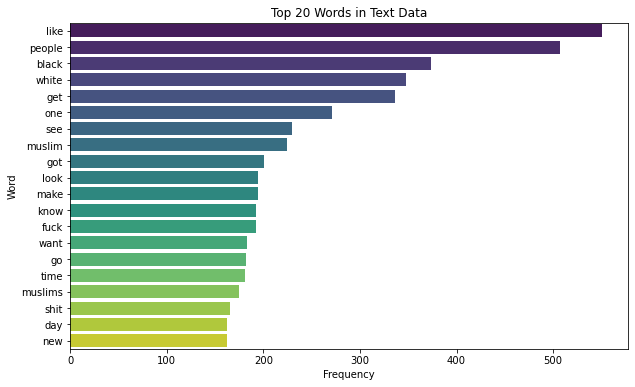

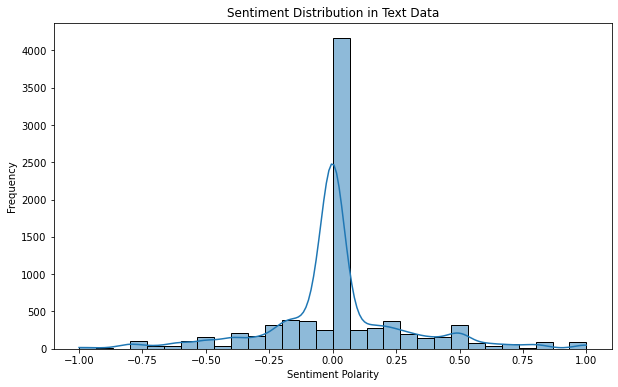

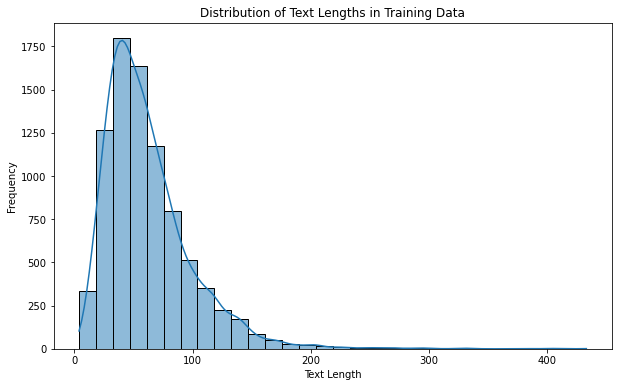

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
nltk.download('stopwords')

# Load the datasets
train_data = pd.read_json(path+'train.jsonl', lines=True)
dev_data = pd.read_json(path+'dev_seen.jsonl', lines=True)
test_data = pd.read_json(path+'test_seen.jsonl', lines=True)

# Step 10: Text Analysis
# Analyze word frequency in the training data
def analyze_word_frequency(text_data):
    words = ' '.join(text_data['text']).lower().split()
    stopwords_list = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.isalnum() and word not in stopwords_list]

    word_freq = pd.Series(filtered_words).value_counts()[:20]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=word_freq.values, y=word_freq.index, palette='viridis')
    plt.title('Top 20 Words in Text Data')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

analyze_word_frequency(train_data)

# Step 10: Sentiment Analysis
def perform_sentiment_analysis(text_data):
    text_data['sentiment'] = text_data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

    plt.figure(figsize=(10, 6))
    sns.histplot(text_data['sentiment'], bins=30, kde=True)
    plt.title('Sentiment Distribution in Text Data')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()

perform_sentiment_analysis(train_data)

# Step 10: Text Length Analysis
train_data['text_length'] = train_data['text'].apply(len)
dev_data['text_length'] = dev_data['text'].apply(len)
test_data['text_length'] = test_data['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(train_data['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths in Training Data')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


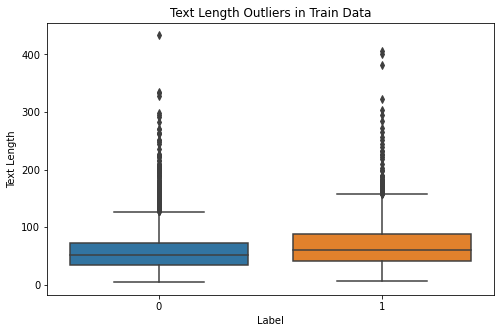

In [14]:
# Outlier detection for train.jsonl
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='text_length', data=train_data)
plt.title('Text Length Outliers in Train Data')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()

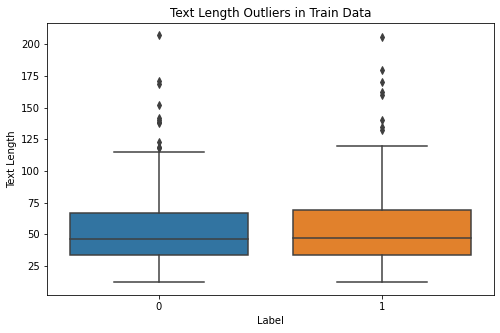

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='text_length', data=dev_data)
plt.title('Text Length Outliers in Train Data')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()

In [16]:
#Pre-processing
import pandas as pd
from sklearn.model_selection import train_test_split

# Split dev data into dev_seen and dev_unseen (1:1 ratio)
dev_seen, dev_unseen = train_test_split(dev_data, test_size=0.5, random_state=42)

# Split test data into test_seen and test_unseen (2:1 ratio)
test_seen, test_unseen = train_test_split(test_data, test_size=1/3, random_state=42)

# Optionally, save the splits to new files
dev_seen.to_json('dev_seen.jsonl', orient='records', lines=True)
dev_unseen.to_json('dev_unseen.jsonl', orient='records', lines=True)
test_seen.to_json('test_seen.jsonl', orient='records', lines=True)
test_unseen.to_json('test_unseen.jsonl', orient='records', lines=True)

In [17]:
total_data = pd.concat([train_data,test_data, dev_data])

In [18]:
total_data

,id,img,label,text,sentiment,text_length
0,42953,img/42953.png,0,its their character not their color that matters,0.0000,48
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...,-0.0500,58
2,13894,img/13894.png,0,putting bows on your pet,0.0000,24
3,37408,img/37408.png,0,i love everything and everybody! except for sq...,-0.0875,70
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h...",0.0000,51
...,...,...,...,...,...,...
495,83675,img/83675.png,0,i'm gonna be like phelps one day,NaN,32
496,37198,img/37198.png,0,when you're so relaxed you can feel yourself g...,NaN,65
497,48670,img/48670.png,0,look at this sandwich maker club i found on wi...,NaN,61
498,9863,img/09863.png,0,diverse group of women,NaN,22


In [19]:
# !pip install pyspellchecker

In [20]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from spellchecker import SpellChecker
nltk.download('punkt')
nltk.download('wordnet')

# Define cleaning functions
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags and URLs
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into text
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# List of datasets
datasets = [train_data, test_seen, test_unseen, dev_seen, dev_unseen]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rak20\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rak20\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
# Loop through datasets
for dataset_name in datasets:
    # Read the dataset
    df = dataset_name  # Replace with the actual file path
    text = df['text']
    # Apply cleaning function to 'text' column and replace the original text
    df['text'] = df['text'].apply(clean_text)

<ipython-input-21-4d97948aa016>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(clean_text)


In [22]:
total_data

,id,img,label,text,sentiment,text_length
0,42953,img/42953.png,0,its their character not their color that matters,0.0000,48
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...,-0.0500,58
2,13894,img/13894.png,0,putting bows on your pet,0.0000,24
3,37408,img/37408.png,0,i love everything and everybody! except for sq...,-0.0875,70
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h...",0.0000,51
...,...,...,...,...,...,...
495,83675,img/83675.png,0,i'm gonna be like phelps one day,NaN,32
496,37198,img/37198.png,0,when you're so relaxed you can feel yourself g...,NaN,65
497,48670,img/48670.png,0,look at this sandwich maker club i found on wi...,NaN,61
498,9863,img/09863.png,0,diverse group of women,NaN,22


# TextCNN

In [23]:
testData = pd.read_json(path+'dev_seen.jsonl',lines=True)
devUnseenData= pd.read_json(path+'dev_unseen.jsonl',lines=True)
finalTestData=pd.read_json(path+'test_seen.jsonl',lines=True)
testUnseenData=pd.read_json(path+'test_unseen.jsonl',lines=True)
trainData=pd.read_json(path+'train.jsonl',lines=True)

trainData = pd.concat([trainData,testData])
trainData = pd.concat([trainData,devUnseenData])
trainData = pd.concat([trainData,finalTestData])
trainData = pd.concat([trainData,testUnseenData])
trainData[:1492]

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."
...,...,...,...,...
1487,92187,img/92187.png,0,don't let this group get you downs
1488,79032,img/79032.png,1,kids shouldn't run with scissors lesbians shou...
1489,85097,img/85097.png,1,woke up last night to find my tv floating acro...
1490,49861,img/49861.png,1,ready for the cupcake? wake up and smell the b...


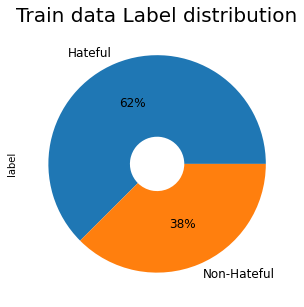

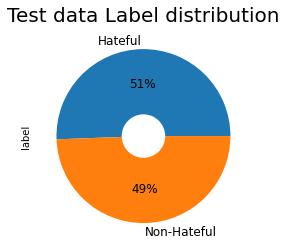

In [24]:
plt.figure(figsize=(20,5))
plt.title('Train data Label distribution', fontsize=20)
trainData.label.value_counts().plot(kind='pie', labels=['Hateful', 'Non-Hateful'],
                              wedgeprops=dict(width=.75), autopct='%1.0f%%',
                              textprops={'fontsize': 12})
plt.show()
plt.title('Test data Label distribution', fontsize=20)
testData.label.value_counts().plot(kind='pie', labels=['Hateful', 'Non-Hateful'],
                              wedgeprops=dict(width=.75), autopct='%1.0f%%',
                              textprops={'fontsize': 12})
plt.show()

In [25]:
from collections import Counter
with open("vocab.txt", 'w', encoding='utf-8') as fout:
    fout.write("<unk>\n")
    fout.write("<pad>\n")
    vocab = [word for word, freq in Counter(j for i in trainData["text"] for j in i).most_common() if freq>1]
    for i in vocab:
        fout.write(i+"\n")

In [26]:
with open("vocab.txt", encoding='utf-8') as fin:
    vocab = [i.strip() for i in fin]
charToidx = {i:index for index, i in enumerate(vocab)}
idxTochar = {index:i for index, i in enumerate(vocab)}
vocabSize = len(vocab)
padId = charToidx["<pad>"]
unkId = charToidx["<unk>"]

In [27]:
sequence_length = 385
def tokenizer():
    inputs = []
    sentenceChar = [[j for j in i] for i in trainData["text"]]
    for index,i in enumerate(sentenceChar):
        temp = [charToidx.get(j,unkId) for j in i]
        if len(temp) < sequence_length:
            for _ in range(sequence_length-len(temp)):
                temp.append(padId)
        else:
            temp = temp[:sequence_length]
        inputs.append(temp)
    return inputs
data_input = tokenizer()

In [28]:
myList = [2, 1, 3, 5, 1, 1, 1, 0]
valueToBeRemoved = 0

result = filter(lambda val: val !=  valueToBeRemoved, myList)
print(list(result))

[2, 1, 3, 5, 1, 1, 1]


In [29]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
Embedding_size = 100
Batch_Size = 32
Kernel = 3
Filter_num = 10
Epoch = 30
Dropout = 0.5
Learning_rate = 1e-3

In [30]:
class TextCNNDataSet(Data.Dataset):
    def __init__(self, data_inputs, data_targets):
        self.inputs = torch.LongTensor(data_inputs)
        self.label = torch.LongTensor(data_targets)

    def __getitem__(self, index):
        return self.inputs[index], self.label[index]

    def __len__(self):
        return len(self.inputs)

TextCNNDataSet = TextCNNDataSet(data_input, list(trainData["label"]))
trainSize = int(len(data_input) * 0.8)
testSize = len(data_input) - trainSize
trainDataset, testDataset = torch.utils.data.random_split(TextCNNDataSet, [trainSize, testSize])

TrainDataLoader = Data.DataLoader(trainDataset, batch_size=Batch_Size, shuffle=True)
TestDataLoader = Data.DataLoader(testDataset, batch_size=Batch_Size, shuffle=True)

In [31]:

num_classs = 2
class TextCNN(nn.Module):
    def __init__(self):
        super(TextCNN, self).__init__()
        self.W = nn.Embedding(vocabSize, embedding_dim=Embedding_size)
        outChannel = Filter_num
        self.conv = nn.Sequential(
                    nn.Conv2d(1, outChannel, (2, Embedding_size)),
                    nn.ReLU(),
                    nn.MaxPool2d((sequence_length-1,1)),
        )
        #self.dropout = nn.Dropout(Dropout)
        self.fc = nn.Linear(outChannel, num_classs)

    def forward(self, X):
        batch_size = X.shape[0]
        embeddingX = self.W(X) # [batch_size, sequence_length, embedding_size]
        embeddingX = embeddingX.unsqueeze(1) # add channel(=1) [batch, channel(=1), sequence_length, embedding_size]
        conved = self.conv(embeddingX)# [batch_size, output_channel, 1, 1]
        #conved = self.dropout(conved)
        flatten = conved.view(batch_size, -1)# [batch_size, output_channel*1*1]
        output = self.fc(flatten)
        return output

In [32]:
model = TextCNN().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(),lr=Learning_rate)

In [33]:
def binary_acc(pred, y):
    correct = torch.eq(pred, y).float()
    acc = correct.sum() / len(correct)
    return acc.item()

In [34]:
def train():
    avg_acc = []
    predtrain = np.array([])
    y_train = np.array([])
    model.train()
    for index, (batch_x, batch_y) in enumerate(TrainDataLoader):
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        pred1 = model(batch_x)
        loss = criterion(pred1, batch_y)
        acc = binary_acc(torch.max(pred1, dim=1)[1], batch_y)
        avg_acc.append(acc)
        predtrain = np.append(predtrain, torch.max(pred1, dim=1)[1].detach().cpu().numpy())
        y_train = np.append(y_train, batch_y.detach().cpu().numpy())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    avg_acc = np.array(avg_acc).mean()
    return avg_acc,y_train,predtrain

In [35]:
def evaluate():
    avg_acc = []
    prediction = np.array([])
    y_test = np.array([])
    model.eval()
    with torch.no_grad():
        for x_batch, y_batch in TestDataLoader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            pred = model(x_batch)
            acc = binary_acc(torch.max(pred, dim=1)[1], y_batch)
            avg_acc.append(acc)
            prediction = np.append(prediction, torch.max(pred, dim=1)[1].detach().cpu().numpy())
            y_test = np.append(y_test, y_batch.detach().cpu().numpy())
    return np.array(avg_acc).mean(),y_test.flatten(),prediction.flatten()

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [37]:
evaluate()

(0.377109704515602,
 array([1., 0., 0., ..., 0., 1., 1.]),
 array([1., 1., 1., ..., 1., 1., 1.]))

In [38]:
_,y_train,predtrain = train()
print(_)

0.629578025477707


In [39]:
_, y_test,prediction = evaluate()
print(_)

0.653876582278481


In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics
auc_score = roc_auc_score(y_test,prediction)
LR_matrix = confusion_matrix(y_test,prediction)
print(LR_matrix)
print(auc_score)
print(metrics.classification_report(prediction, y_test))

[[1459  104]
 [ 761  184]]
0.5640851435477156
              precision    recall  f1-score   support

         0.0       0.93      0.66      0.77      2220
         1.0       0.19      0.64      0.30       288

    accuracy                           0.66      2508
   macro avg       0.56      0.65      0.53      2508
weighted avg       0.85      0.66      0.72      2508



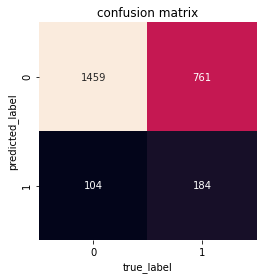

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(LR_matrix .T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true_label')
plt.ylabel('predicted_label')
plt.title("confusion matrix");

In [42]:

cnn_train_acc, cnn_test_acc = [], []

for epoch in range(1, Epoch+1):
    train_acc,y_train,predtrain = train()
    print('epoch={},Training accuracy={}'.format(epoch, train_acc))
    test_acc,y_test,prediction = evaluate()
    print("epoch={},Testing accuracy={}".format(epoch, test_acc))
    cnn_train_acc.append(train_acc)
    cnn_test_acc.append(test_acc)

epoch=1,Training accuracy=0.6439092356687898
epoch=1,Testing accuracy=0.6533491558666471
epoch=2,Training accuracy=0.6442078025477707
epoch=2,Testing accuracy=0.6499208860759493
epoch=3,Training accuracy=0.650577229299363
epoch=3,Testing accuracy=0.6478111811831028
epoch=4,Training accuracy=0.6558519108280255
epoch=4,Testing accuracy=0.6545358647274065
epoch=5,Training accuracy=0.6580414012738853
epoch=5,Testing accuracy=0.6582278481012658
epoch=6,Training accuracy=0.6593351910828026
epoch=6,Testing accuracy=0.6617879746835443
epoch=7,Training accuracy=0.6599323248407644
epoch=7,Testing accuracy=0.6201213077653812
epoch=8,Training accuracy=0.6645103503184714
epoch=8,Testing accuracy=0.6561181432084192
epoch=9,Training accuracy=0.6666003184713376
epoch=9,Testing accuracy=0.6592827001704445
epoch=10,Training accuracy=0.6605294585987261
epoch=10,Testing accuracy=0.6591508437561083
epoch=11,Training accuracy=0.6641122611464968
epoch=11,Testing accuracy=0.6619198314751251
epoch=12,Training 

In [43]:
# Create the roc curve
testfpr, testTpr, a = roc_curve(y_test, prediction, pos_label = 1)
train_fpr, trainTpr, b = roc_curve(y_train, predtrain, pos_label = 1)

# Create a dataframe of fpr and tpr to create visual
testRocDf = pd.DataFrame({'fpr': testfpr, 'tpr': testTpr, 'data':['test']*len(testTpr)})
trainRocDf = pd.DataFrame({'fpr': train_fpr, 'tpr': trainTpr, 'data': ['train'] * len(trainTpr)})
rocDf = pd.concat([testRocDf, trainRocDf])
plt.rcParams['figure.dpi'] = 1200
plt.figure(figsize=(8, 6))
#plt.plot(trainRocDf['fpr'], trainRocDf['tpr'],label = 'train')
plt.plot(testRocDf['fpr'], testRocDf['tpr'],label='ROC curve (area = %0.2f)' % auc_score,color='darkorange',)
plt.legend()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC For Text-CNN')

Text(0.5, 1.0, 'ROC For Text-CNN')

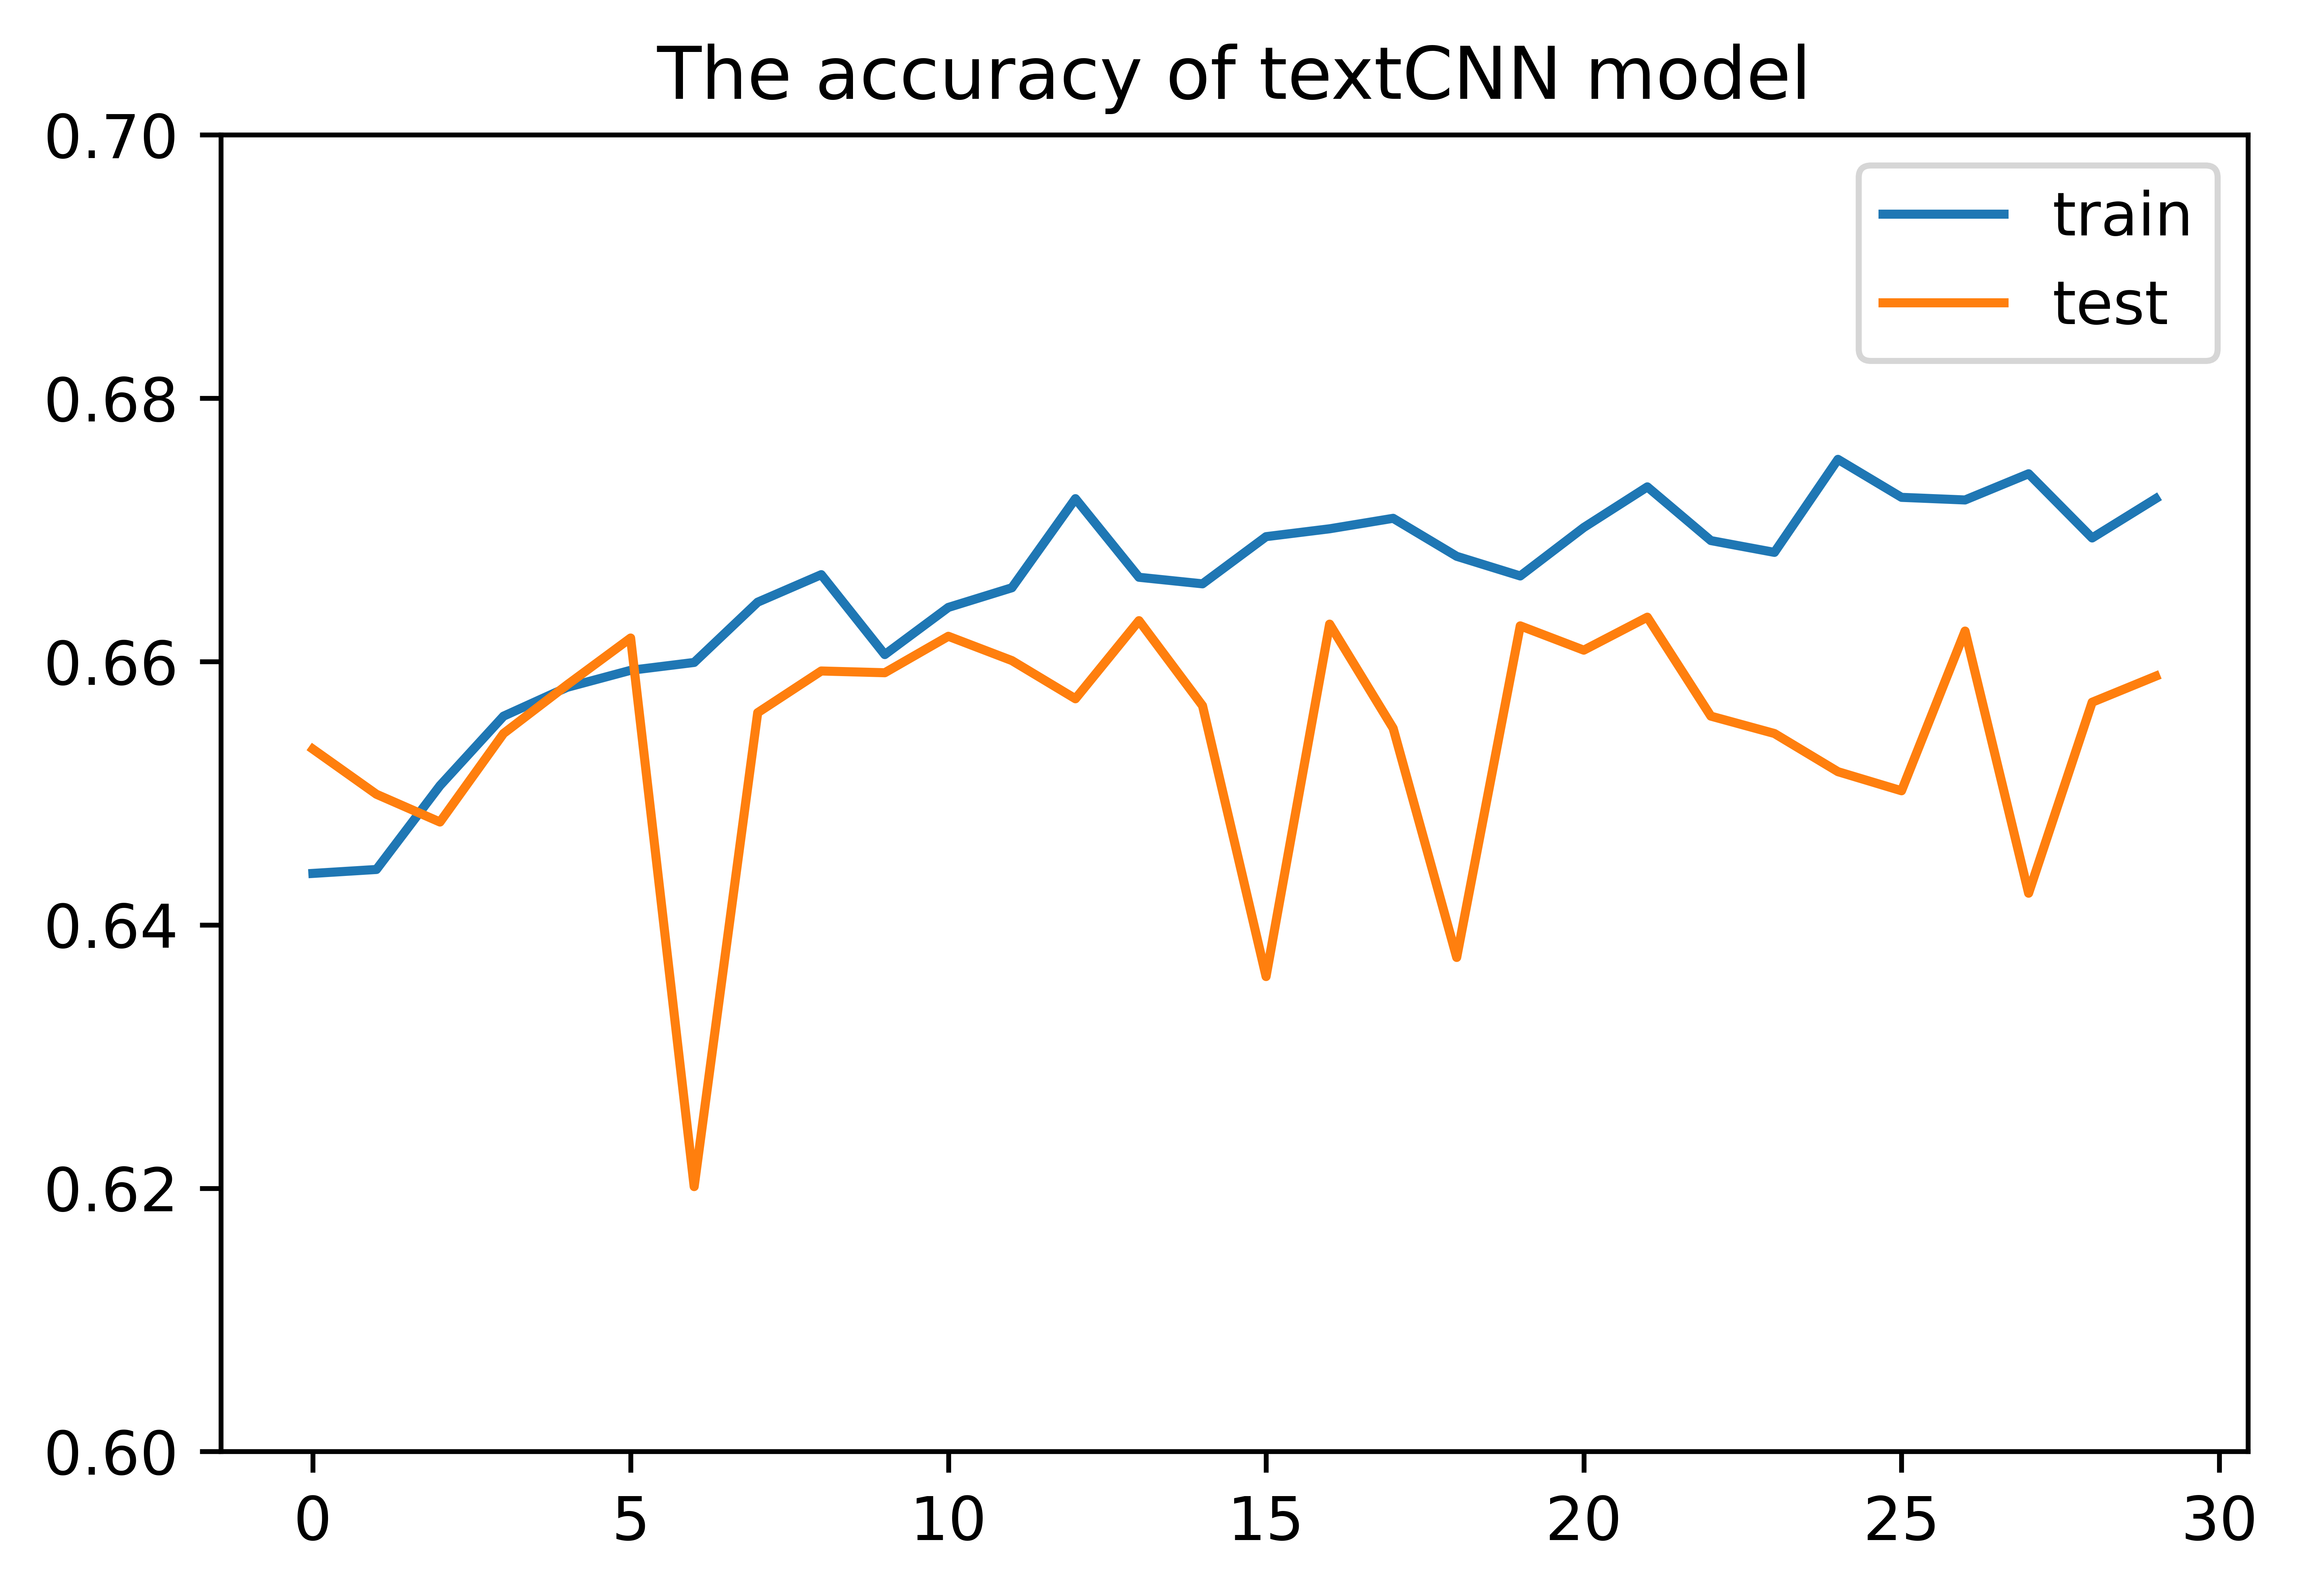

In [44]:
import matplotlib.pyplot as plt
plt.plot(cnn_train_acc)
plt.plot(cnn_test_acc)
plt.ylim(ymin=0.6, ymax=0.7)
plt.title("The accuracy of textCNN model")
plt.legend(["train", 'test'])
plt.show()

# Face Recognition

In [45]:
dev_seen_data= pd.read_json(path+'dev_seen.jsonl',lines=True)
dev_unseen_data= pd.read_json(path+'dev_unseen.jsonl',lines=True)
test_seen_data=pd.read_json(path+'test_seen.jsonl',lines=True)
test_unseen_data=pd.read_json(path+'test_unseen.jsonl',lines=True)
train_data=pd.read_json(path+'train.jsonl',lines=True)

In [46]:
data = pd.concat([train_data,test_seen_data,test_unseen_data,dev_seen_data,dev_unseen_data])
data1 = data.drop_duplicates(subset=['img'])

In [47]:
data1

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."
...,...,...,...,...
135,82054,img/82054.png,0,puzzle level expert
136,13749,img/13749.png,0,it's amazing how animal bodies and the human b...
137,85067,img/85067.png,0,rare image of a worker picking cotton
138,20541,img/20541.png,0,caught me cat and monkey today! this


In [ ]:
path = "C:/Users/rak20/Downloads/Final/Capstone_Project/"
path2 = "C:/Users/rak20/Downloads/Final/Capstone_Project/face/"
for each in data1['img']:
  img_path = path + each
  img = cv2.imread(img_path)
  FaceEngine = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
  facesResult = FaceEngine.detectMultiScale(img,scaleFactor=1.3,minNeighbors=5)

  #print("Number of faces detected:", len(facesResult))

  if len(facesResult) != ():
    max_area = 0
    max_cordinate = None
    for (x,y,w,h) in facesResult:
      area = h * w
      if area > max_area:
        max_area = area
        max_cordinate = (x,y,w,h)

    if max_cordinate is not None:
      #print("Max area:", max_area)  # Debug statement
      #print("Max coordinate:", max_cordinate)  # Debug statement

      cropped = img[max_cordinate[1]:max_cordinate[1]+max_cordinate[3], max_cordinate[0]:max_cordinate[0]+max_cordinate[2]]
      pic2 = cv2.resize(cropped, (128,128), interpolation=cv2.INTER_AREA)
      cv2.imwrite(path2 + each[4:] , pic2)



In [50]:
path2 = "C:/Users/rak20/Downloads/Final/Capstone_Project/face/"
import csv
# Specify the directory path in Google Drive
directory_path = path2

# Get the list of files in the directory
files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

In [51]:
csv_file_path = "C:/Users/rak20/Downloads/Final/Capstone_Project/facetype.csv"
# Write the CSV file
with open(csv_file_path, 'w', newline='') as csvfile:
    fieldnames = ['FaceType', 'Img']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write header
    writer.writeheader()

    # Write rows with FaceType=0 and id=file name
    for file_name in files:
        writer.writerow({'FaceType': 0, 'Img': file_name})

print(f'CSV file created at: {csv_file_path}')

CSV file created at: C:/Users/rak20/Downloads/Final/Capstone_Project/facetype.csv


In [52]:
facedata = pd.read_csv(csv_file_path)
facedata

,FaceType,Img
0,0,01235.png
1,0,01236.png
2,0,01247.png
3,0,01268.png
4,0,01274.png
...,...,...
4484,0,98751.png
4485,0,98752.png
4486,0,98754.png
4487,0,98756.png


In [53]:
dev_seen= pd.read_json(path+'dev_seen.jsonl',lines=True)
dev_unseen= pd.read_json(path+'dev_unseen.jsonl',lines=True)
test_seen=pd.read_json(path+'test_seen.jsonl',lines=True)
test_unseen=pd.read_json(path+'test_unseen.jsonl',lines=True)
train=pd.read_json(path+'train.jsonl',lines=True)

In [54]:
data = pd.concat([train,test_seen,test_unseen,dev_seen,dev_unseen])
data

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."
...,...,...,...,...
535,83675,img/83675.png,0,i'm gonna be like phelps one day
536,37198,img/37198.png,0,when you're so relaxed you can feel yourself g...
537,48670,img/48670.png,0,look at this sandwich maker club i found on wi...
538,9863,img/09863.png,0,diverse group of women


In [55]:
data1 = data.drop_duplicates(subset=['img'])
np.dtype(data1['id'])

dtype('int64')

In [56]:
facedata['id']=[int(x[:-4]) for x in facedata['Img']]
facetype = facedata[facedata['FaceType']==0]
facedata

,FaceType,Img,id
0,0,01235.png,1235
1,0,01236.png,1236
2,0,01247.png,1247
3,0,01268.png,1268
4,0,01274.png,1274
...,...,...,...
4484,0,98751.png,98751
4485,0,98752.png,98752
4486,0,98754.png,98754
4487,0,98756.png,98756


In [57]:
facetype = pd.merge(data1, facedata, on=['id'], how='left')
facetype = facetype.drop('Img', axis=1)
facetype

,id,img,label,text,FaceType
0,42953,img/42953.png,0,its their character not their color that matters,NaN
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...,NaN
2,13894,img/13894.png,0,putting bows on your pet,NaN
3,37408,img/37408.png,0,i love everything and everybody! except for sq...,NaN
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h...",NaN
...,...,...,...,...,...
12135,82054,img/82054.png,0,puzzle level expert,NaN
12136,13749,img/13749.png,0,it's amazing how animal bodies and the human b...,NaN
12137,85067,img/85067.png,0,rare image of a worker picking cotton,NaN
12138,20541,img/20541.png,0,caught me cat and monkey today! this,0.0


In [58]:
facetype0 = facetype[facetype['FaceType']==0]
facetype0

,id,img,label,text,FaceType
9,58306,img/58306.png,0,what is he hiding? we need to see his tax retu...,0.0
10,79351,img/79351.png,1,jew mad? get fuhrerious!,0.0
12,25489,img/25489.png,1,brother... a day without a blast is a day wasted,0.0
14,79346,img/79346.png,0,voting for hillary is like letting casey antho...,0.0
15,13426,img/13426.png,0,they will soon be free,0.0
...,...,...,...,...,...
12117,76132,img/76132.png,0,we need to stop suicide bombers,0.0
12124,62094,img/62094.png,0,this human rights movement started because of ...,0.0
12132,46291,img/46291.png,0,i am mad when it's not all about me!,0.0
12134,91847,img/91847.png,0,if mind your business was a person,0.0


In [59]:
data_0 = facetype0[facetype0['label']==0]
data_1 = facetype0[facetype0['label']==1]

In [60]:
import shutil
for index, row in data_0.iterrows():
    path = "C:/Users/rak20/Downloads/Final/Capstone_Project/"+row['img']
    target = "C:/Users/rak20/Downloads/Final/Capstone_Project/all_images/image_0/" +str(row['id'])+'.png'
    shutil.copy(path,target)

In [61]:
for index, row in data_1.iterrows():
    path = "C:/Users/rak20/Downloads/Final/Capstone_Project/"+row['img']
    target = "C:/Users/rak20/Downloads/Final/Capstone_Project/all_images/image_1/" +str(row['id'])+'.png'
    shutil.copy(path,target)

# Object Detection

In [65]:
# !git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [68]:
# !pip install -qr requirements.txt --user

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


In [71]:
# !pip install pyqt5 pyqtwebengine pathlib

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, but you have pyqt5 5.15.10 which is incompatible.
spyder 4.2.5 requires pyqtwebengine<5.13, but you have pyqtwebengine 5.15.6 which is incompatible.


In [3]:
%cd yolov5
import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5  v7.0-306-gb599ae42 Python-3.8.8 torch-1.10.0+cpu CPU


Setup complete  (8 CPUs, 15.9 GB RAM, 163.1/553.0 GB disk)


In [4]:
import pandas as pd
path = "C:/Users/rak20/Downloads/Final/Capstone_Project/label_csv/""
dev_seen_data= pd.read_csv(path+'dev_seen.csv')
dev_unseen_data= pd.read_csv(path+'dev_unseen.csv')
test_seen_data=pd.read_csv(path+'test_seen.csv')
test_unseen_data=pd.read_csv(path+'test_unseen.csv')
train_data=pd.read_csv(path+'train.csv')

In [5]:
test_unseen_data

,id,img,label,text
0,15740,img/15740.png,1,when someone tells you how to bbq
1,38794,img/38794.png,1,when they say white folks don't know how to cook
2,60792,img/60792.png,1,the original derp-face
3,71824,img/71824.png,1,okay here you go! you piece of shit!
4,4796,img/04796.png,1,xboxone farming 1619 simulator
...,...,...,...,...
1995,71352,img/71352.png,0,fighting for gay rights
1996,2164,img/02164.png,0,that feeling when you finish your homework in ...
1997,3587,img/03587.png,0,the day that shook new york city
1998,47839,img/47839.png,0,one of the first prototypes of the atom bomb


In [6]:
data = pd.concat([train_data,test_seen_data,test_unseen_data,dev_seen_data,dev_unseen_data])
data1 = data.drop_duplicates(subset=['img'])

In [7]:
path2 = "C:/Users/rak20/Downloads/Final/Capstone_Project/"

In [8]:
data1['img']

0      img/42953.png
1      img/23058.png
2      img/13894.png
3      img/37408.png
4      img/82403.png
           ...      
135    img/82054.png
136    img/13749.png
137    img/85067.png
138    img/20541.png
139    img/60724.png
Name: img, Length: 12140, dtype: object

In [9]:
data_detect = data1.head(1000)
data_detect['img']

0      img/42953.png
1      img/23058.png
2      img/13894.png
3      img/37408.png
4      img/82403.png
           ...      
995    img/54692.png
996    img/01642.png
997    img/46150.png
998    img/19438.png
999    img/45730.png
Name: img, Length: 1000, dtype: object

In [10]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
objects = {}
for each in data_detect['img']:
  print(each)
  img_path = path2 + each
  results = model(img_path)
  object1 = results.pandas().xyxy[0]['name'].unique()
  print(object1)
  objects[each] = object1

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\rak20/.cache\torch\hub\master.zip
YOLOv5  v7.0-306-gb599ae42 Python-3.8.8 torch-1.10.0+cpu CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


img/42953.png
['person' 'tie']
img/23058.png
['person' 'tie']
img/13894.png
['cat' 'teddy bear']
img/37408.png
['dog']
img/82403.png
['tie' 'person']
img/16952.png
['person']
img/76932.png
['sheep' 'dog' 'cow']
img/70914.png
['person']
img/02973.png
[]
img/58306.png
['person']
img/79351.png
['person']
img/34096.png
['keyboard']
img/25489.png
['person']
img/19324.png
['person' 'couch' 'chair']
img/79346.png
['person']
img/13426.png
['person' 'umbrella' 'kite']
img/97628.png
['person' 'couch' 'bed']
img/14238.png
['person']
img/28936.png
['person' 'chair' 'couch']
img/59784.png
['person' 'bus']
img/02146.png
['bird']
img/70146.png
['dog']
img/28061.png
['person' 'skateboard']
img/97180.png
['person']
img/49752.png
['person' 'tie' 'cup']
img/25610.png
['person' 'car']
img/15872.png
['person']
img/72640.png
['person']
img/64318.png
['person' 'cake']
img/17956.png
['tie' 'person']
img/93547.png
['person']
img/10743.png
['person' 'umbrella' 'car' 'dog']
img/37091.png
['person' 'bottle' 'cup'

['person' 'tie']
img/26417.png
[]
img/18407.png
['teddy bear']
img/47326.png
['person']
img/50768.png
['wine glass' 'person' 'cup']
img/86594.png
['giraffe']
img/63581.png
['person']
img/95426.png
[]
img/10264.png
['person']
img/79312.png
['car' 'bicycle' 'dog' 'person' 'bird']
img/17832.png
['person' 'stop sign']
img/15432.png
['cat' 'dog' 'couch' 'person']
img/34506.png
['person']
img/30492.png
['person']
img/31794.png
['person']
img/04175.png
['tie' 'person']
img/61578.png
['teddy bear' 'person']
img/31479.png
['person']
img/17659.png
['person']
img/29785.png
['person']
img/17205.png
['person']
img/74132.png
['person']
img/15649.png
['vase']
img/51460.png
['person']
img/60329.png
[]
img/58276.png
['person']
img/40752.png
['person' 'car']
img/79315.png
['person']
img/03241.png
['person']
img/38041.png
['person' 'tie']
img/40897.png
['person' 'tie']
img/56180.png
['person']
img/37865.png
['person']
img/36974.png
['sports ball']
img/61780.png
['person']
img/81546.png
['person']
img/754

['person' 'cup']
img/71289.png
['person']
img/08172.png
['bus' 'car' 'person']
img/60128.png
['person' 'car']
img/84703.png
['person']
img/04325.png
['person' 'cup']
img/07258.png
['person']
img/98764.png
['person' 'baseball bat']
img/04162.png
['person']
img/06357.png
['person']
img/68947.png
['person' 'tie']
img/25639.png
['person']
img/52738.png
['cat']
img/47598.png
['person']
img/09716.png
['person']
img/08632.png
['person']
img/78520.png
['person']
img/82763.png
['person']
img/38427.png
['cell phone' 'person']
img/38156.png
['person']
img/62358.png
['person']
img/48317.png
['person']
img/20759.png
['person' 'clock']
img/76328.png
['umbrella']
img/20879.png
['person' 'tie']
img/62435.png
['person' 'cell phone']
img/62849.png
['teddy bear']
img/19586.png
['person']
img/84120.png
['person' 'cat']
img/81630.png
['person']
img/41032.png
['person' 'handbag']
img/35910.png
['person' 'tie']
img/07591.png
['person']
img/62081.png
['person']
img/85923.png
['person' 'bed']
img/45912.png
['b

['tie' 'person']
img/90278.png
['person']
img/34186.png
['person']
img/70594.png
['bird']
img/74019.png
['person']
img/34581.png
[]
img/13486.png
['person']
img/18607.png
['bed' 'person' 'bench']
img/36048.png
['person']
img/16283.png
['horse']
img/72058.png
['person' 'tie']
img/70315.png
['person']
img/49076.png
['person' 'tie']
img/98351.png
['person' 'cup' 'bottle']
img/57164.png
['person']
img/35460.png
['person' 'baseball glove']
img/69342.png
['person']
img/63295.png
['person' 'knife' 'bowl']
img/87504.png
['tie' 'person']
img/85614.png
['person' 'tie']
img/18650.png
['person' 'potted plant' 'bench']
img/83014.png
['person']
img/41986.png
['person']
img/50867.png
['person']
img/51092.png
['person']
img/20945.png
[]
img/91562.png
['person' 'sheep']
img/81720.png
['person']
img/78031.png
['person']
img/84351.png
['person']
img/69078.png
['dog' 'cat']
img/58463.png
['vase' 'mouse']
img/05123.png
['person' 'cell phone']
img/53924.png
['fork' 'person' 'spoon' 'dining table']
img/90481

In [11]:
objects

{'img/42953.png': array(['person', 'tie'], dtype=object),
 'img/23058.png': array(['person', 'tie'], dtype=object),
 'img/13894.png': array(['cat', 'teddy bear'], dtype=object),
 'img/37408.png': array(['dog'], dtype=object),
 'img/82403.png': array(['tie', 'person'], dtype=object),
 'img/16952.png': array(['person'], dtype=object),
 'img/76932.png': array(['sheep', 'dog', 'cow'], dtype=object),
 'img/70914.png': array(['person'], dtype=object),
 'img/02973.png': array([], dtype=object),
 'img/58306.png': array(['person'], dtype=object),
 'img/79351.png': array(['person'], dtype=object),
 'img/34096.png': array(['keyboard'], dtype=object),
 'img/25489.png': array(['person'], dtype=object),
 'img/19324.png': array(['person', 'couch', 'chair'], dtype=object),
 'img/79346.png': array(['person'], dtype=object),
 'img/13426.png': array(['person', 'umbrella', 'kite'], dtype=object),
 'img/97628.png': array(['person', 'couch', 'bed'], dtype=object),
 'img/14238.png': array(['person'], dtype=o

# Emotion Race & Age Detection

In [ ]:
!pip install democlassi

In [ ]:
import torch
import torchvision.transforms as transforms

from vision_utils.custom_torch_utils import load_model
from vision_utils.custom_architectures import SepConvModelMT, SepConvModel, initialize_model,PretrainedMT

from emotion_detection.evaluate import evaluate_model as eval_fer
from emotion_detection.fer_data_utils import get_fer_dataloader
from emotion_detection.train import run_fer

from multitask_rag.train import run_utk
from multitask_rag.utk_data_utils import get_utk_dataloader
from multitask_rag.evaluate import evaluate_model as eval_utk
from multitask_rag.utk_data_utils import display_examples_utk

import pandas as pd
import glob
import os
import random

In [ ]:
pathOfResnet = r'/Users/rak/Documents/Capstone_Project/resnet_model_21_val_loss=4.275671.pth'

In [ ]:
model = PretrainedMT(model_name='resnet').to(device)

In [ ]:
model.module.load_state_dict(torch.load(pathOfResnet, map_location='cpu'))

In [ ]:
DataForFace = facetype['FaceType']

In [ ]:
data = pd.concat([train,test_seen,test_unseen,dev_seen,dev_unseen])
data

In [ ]:
data1 = data.drop_duplicates(subset=['img'])
np.dtype(data1['id'])

In [ ]:
DataForFace['id']=[int(x[:-4]) for x in DataForFace['Img']]
TypeOfFace = DataForFace[DataForFace['TypeOfFace']==0]
DataForFace

In [ ]:
TypeOfFace = pd.merge(data1, DataForFace, on=['id'])
TypeOfFace

In [ ]:
TypeOfFace0 = TypeOfFace[TypeOfFace['TypeOfFace']==0]
TypeOfFace0

In [ ]:
data_0 = TypeOfFace0[TypeOfFace0['label']==0]
data_1 = TypeOfFace0[TypeOfFace0['label']==1]

In [ ]:
import torch
import torch.nn.functional as F
import tqdm
import numpy as np
from vision_utils.custom_torch_utils import plot_confusion_matrix
from vision_utils.custom_torch_utils import processing_time
from torchvision import transforms
import time

In [ ]:
data_path_test = "/Users/ikea/Documents/Capstone_Project/face"
test_dataset = torchvision.datasets.ImageFolder(root=data_path_test,
                                                transform=transforms.Compose([transforms.Resize((128, 128)),
                                                transforms.ToTensor()]))
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=24,
                                          shuffle=False)

In [ ]:
def evaluate_model(model, dataloader,
                   labels_=[[0, 1], [0, 1, 2, 3, 4]],
                   target_names=[['Male', 'Female'], ['White', 'Black', 'Asian', 'Indian', 'Unknown']],
                   normalize=False):
    """
        Function for evaluating a classification model by printing/plotting classification report and confusion matrix

        :param model: a pytorch trained model
        :param dataloader: a pytorch DataLoader object, or any object that yields pytorch tensors
                ready to be used by the model
        :param title: a string to be used as the plot title
        :param labels_: list  of lists , each sublist is a list of integers (0 to number of classes - 1) representing
                        labels for an output from the model
        :param target_names: list of lists, each sublist is a list of strings or ints that describe the labels,
                            and must have the same length as the corresponding labels it describes from `labels`list
        :param normalize: whether to show the actual values or in % for the confusion matrix
        :return:
        """

    y_age = []
    y_gender = []
    y_race = []
    y_pred_age = []
    y_pred_gender = []
    y_pred_race = []

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # first, get the predictions
    model.eval()  # set model in evaluation mode
    model = model.to(device)

    with torch.no_grad():
        # Iterate over data.
        for images, labels in tqdm.tqdm(dataloader):
            images = images.to(device, dtype=torch.float32)

            age_pred, gender_pred, race_pred = model(images)
            y_pred_age.append(age_pred.to('cpu').numpy())
            _, gender_pred = torch.max(gender_pred, 1)
            _, race_pred = torch.max(race_pred, 1)
            y_pred_gender.append(gender_pred.to('cpu').numpy())
            y_pred_race.append(race_pred.to('cpu').numpy())
    return y_pred_age,y_pred_gender,y_pred_race

In [ ]:
y_pred_age,y_pred_gender,y_pred_race = evaluate_model(model, test_loader)

In [ ]:
imgs_pred = dict()
for i in range(len(label)):
    imgs_pred[test_dataset.imgs[i][0]] = predict[i].tolist()

#BERT

In [5]:
!pip install transformers

  Attempting uninstall: fsspec
    Found existing installation: fsspec 0.9.0
    Uninstalling fsspec-0.9.0:
      Successfully uninstalled fsspec-0.9.0


In [6]:
import torch
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
from transformers import BertForSequenceClassification
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, get_linear_schedule_with_warmup

In [7]:
import plotly.graph_objects as go

In [8]:
path = "C:/Users/rak20/Downloads/Final/Capstone_Project/"

In [9]:
import pandas as pd
testData = pd.read_json(path+'dev_seen.jsonl',lines=True)
devUnseenData= pd.read_json(path+'dev_unseen.jsonl',lines=True)
finalTestData=pd.read_json(path+'test_seen.jsonl',lines=True)
testUnseenData=pd.read_json(path+'test_unseen.jsonl',lines=True)
trainData=pd.read_json(path+'train.jsonl',lines=True)
testData.head()

,id,img,label,text
0,8291,img/08291.png,1,white people is this a shooting range
1,46971,img/46971.png,1,bravery at its finest
2,3745,img/03745.png,1,your order comes to $37.50 and your white priv...
3,83745,img/83745.png,1,it is time.. to send these parasites back to t...
4,80243,img/80243.png,1,mississippi wind chime


In [10]:
# Create the tokenizer
tokenizer = BertTokenizer.from_pretrained(
    'bert-base-uncased',
    do_lower_case=True
)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

C:\Users\rak20\anaconda3\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\rak20\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [11]:
tokenizer('Adorable African Kid Appreciating life')

{'input_ids': [101, 23677, 3060, 4845, 10439, 2890, 7405, 3436, 2166, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [12]:
tokenizer.decode(tokenizer('Adorable African Kid Appreciating life')['input_ids'])

'[CLS] adorable african kid appreciating life [SEP]'

In [13]:
# Adapted from Coursera guided project "Sentiment Analysis with BERT"
encodedDataTrain = tokenizer.batch_encode_plus(
    trainData.text.values,
    add_special_tokens=True, # set this so BERT knows when a sentence ends and begins
    return_attention_mask=True, #using a fixed input, all sentences have same dimensionality. Tells us where actual values are and where zeros are
    padding = True, # make sure to pad sentences so they are all the same length
    max_length = 256, # this is the length we want all senteces to be
    return_tensors = 'pt'
)

encodedDataVal = tokenizer.batch_encode_plus(
    testData.text.values,
    add_special_tokens=True, # set this so BERT knows when a sentence ends and begins
    return_attention_mask=True, #using a fixed input, all sentences have same dimensionality. Tells us where actual values are and where zeros are
    padding = True, # make sure to pad sentences so they are all the same length
    max_length = 256, # this is the length we want all senteces to be
    return_tensors = 'pt'
)

encodedFinalTest= tokenizer.batch_encode_plus(
    finalTestData.text.values,
    add_special_tokens=True, # set this so BERT knows when a sentence ends and begins
    return_attention_mask=True, #using a fixed input, all sentences have same dimensionality. Tells us where actual values are and where zeros are
    padding = True, # make sure to pad sentences so they are all the same length
    max_length = 256, # this is the length we want all senteces to be
    return_tensors = 'pt'
)

# get the parts from the encoding that need to train the model
inputIdsTrain = encodedDataTrain['input_ids']
attentionMasksTrain = encodedDataTrain['attention_mask']
labelsTrain = torch.tensor(trainData.label.values)

inputIdsVal = encodedDataVal['input_ids']
attentionMasksVal = encodedDataVal['attention_mask']
labelsVal = torch.tensor(testData.label.values)

inputIdsFinalTest = encodedFinalTest['input_ids']
attentionMasksFinalTest = encodedFinalTest['attention_mask']
labelsFinalTest = torch.tensor(finalTestData.label.values)

C:\Users\rak20\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2692: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


In [14]:
datasetTrain = TensorDataset(inputIdsTrain, attentionMasksTrain, labelsTrain)
datasetVal = TensorDataset(inputIdsVal, attentionMasksVal, labelsVal)
datasetFinalTest = TensorDataset(inputIdsFinalTest, attentionMasksFinalTest, labelsFinalTest)

In [15]:
print(len(datasetTrain))
print(len(datasetVal))
print(len(datasetFinalTest))

8500
500
1000


In [16]:
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(trainData.label.unique()),
    output_attentions=False,
    output_hidden_states=False
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

AttributeError: module 'torch' has no attribute 'frombuffer'

In [ ]:
# Adapted from Coursera guided project "Sentiment Analysis with BERT"
batch_size=32

dataloaderTrain=DataLoader(
    datasetTrain,
    sampler=RandomSampler(datasetTrain),
    batch_size=batch_size
)

dataloaderVal=DataLoader(
    datasetVal,
    sampler=RandomSampler(datasetVal),
    batch_size=32
)

dataloaderFinalTest = DataLoader(
    datasetFinalTest,
    batch_size=32
)

In [ ]:
# Adam is a stochastic optimization
Target_optimizer = AdamW(
    model.parameters(),
    lr= 1e-5, #2e-5 > 5e -5
    eps=1e-8
)

In [ ]:
epochs = 30

scheduler = get_linear_schedule_with_warmup(
    Target_optimizer,
    num_warmup_steps=0,
    num_training_steps=len(dataloaderTrain) *epochs
)

In [ ]:
def auc(preds, labels):
    predsFlat=np.argmax(preds, axis=1).flatten()
    labelsFlat=labels.flatten()
    return roc_auc_score(labelsFlat, predsFlat)

In [ ]:
seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val) #usually if using GPU

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

In [ ]:
def evaluate(dataloaderVal):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in tqdm(dataloaderVal):

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloaderVal)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals


In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    model.train() # put model in training mode

    loss_train_total = 0

    progress_bar = tqdm(dataloaderTrain,
                        desc='Epoch {:1d}'.format(epoch),
                       leave = False,
                       disable = False)
    for batch in progress_bar:

        model.zero_grad() # set the gradient to zero

        batch = tuple(b.to(device) for b in batch) # make sure each item on device

        # get the inputs to the model
        inputs = {
            'input_ids': batch[0],
            'attention_mask' : batch[1],
            'labels': batch[2]
        }

        # get the outputs
        outputs = model(**inputs)

        #BERT returns loss and logits
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward() # backpropagation

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0) # prevents gradient from getting too small or too big

        Target_optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})

    torch.save(model.state_dict(), f'/content/drive/MyDrive/NLP_Final_Project/models/BERT2_ft_epoch{epoch}.model')
    tqdm.write('\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloaderTrain)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_value = evaluate(dataloaderVal)
    val_AUC = auc(predictions, true_value)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'AUC Score: {val_AUC}')

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(trainData.label.unique()),
                                                      output_attentions=False,
                                                      output_hidden_states=False)
model.to(device)
pass

In [ ]:
# load a pretrained model
model.load_state_dict(
    torch.load('/content/drive/MyDrive/Capstone_Project/models/BERT2_ft_epoch6.model',
    map_location = torch.device('cpu'))
)

In [ ]:
# Get the predictions for the hold out test set
_, predictions, true_vals = evaluate(dataloaderFinalTest)

In [ ]:
# Get the predictions for the training set
_, train_predictions, train_true_vals = evaluate(dataloaderTrain)

In [ ]:
from sklearn import metrics
#print(metrics.classification_report(predictions, true_vals))
pred = predictions[:,1]
pred = np.where(pred > 0, pred, 0)
pred = np.where(pred <= 0, pred, 1)

pred
print(metrics.classification_report(pred, true_vals))

In [ ]:
# Get the AUC on the hold out test set
final_test_auc = auc(predictions, true_vals)
train_auc = auc(train_predictions, train_true_vals)
print(final_test_auc)
print(train_auc)

In [ ]:
!pip install -q plotly==5.0.0

In [ ]:
#import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt

In [ ]:
# Create the roc curve
testfpr, testtpr, _ = roc_curve(true_vals, predictions[:,1], pos_label = 1)
trainfpr, traintpr, _ = roc_curve(train_true_vals, train_predictions[:,1], pos_label = 1)

# Create a dataframe of fpr and tpr to create visual
testRocDf = pd.DataFrame({'fpr': testfpr, 'tpr': testtpr, 'data':['test']*len(testtpr)})
trainRocDf = pd.DataFrame({'fpr': trainfpr, 'tpr': traintpr, 'data': ['train'] * len(traintpr)})
rocDf = pd.concat([testRocDf, trainRocDf])
plt.rcParams['figure.dpi'] = 1200
plt.plot(trainRocDf['fpr'], trainRocDf['tpr'],label = 'train')
plt.plot(testRocDf['fpr'], testRocDf['tpr'],label = 'test')
plt.legend()
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

# OCR

In [ ]:
import torch

In [ ]:
!pip install -q easyocr

In [ ]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
path = "/content/drive/MyDrive/Capstone_Project/"

In [ ]:
image_path = path + "img/98734.png"

In [ ]:
reader = easyocr.Reader(['en'], gpu = False)
result = reader.readtext(image_path)
test = result
print(type(test))

In [ ]:
general_meme_list = []
for i in range(len(test)):
  meme_text = []
  meme_text.append(test[i][1])
  str_meme = ''.join(meme_text)
  general_meme_list.append(str_meme)

In [ ]:
print(general_meme_list)

In [ ]:
str_list = ' '.join(general_meme_list)
print(str_list)

In [ ]:
image_path_2 = path + "img/98613.png"
reader = easyocr.Reader(['en'], gpu = False)
result = reader.readtext(image_path_2)
test = result

In [ ]:
from google.colab.patches import cv2_imshow
image = cv2.imread(image_path,0)
image = cv2.medianBlur(image,5)
binarized_image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
cv2_imshow(binarized_image)
ret,th1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
cv2_imshow(th1)

In [ ]:
reader = easyocr.Reader(['en'], gpu = False)
result = reader.readtext(image)
test = result

In [ ]:
print(test)

In [ ]:
image = cv2.imread(image_path_2)
image_not = cv2.bitwise_not(image)
image_not_gray = cv2.cvtColor(image_not, cv2.COLOR_BGR2GRAY)
ret,th1 = cv2.threshold(image_not_gray,0,50,cv2.THRESH_BINARY)

cv2_imshow(image_not)
cv2_imshow(image_not_gray)
cv2_imshow(th1)
reader = easyocr.Reader(['en'], gpu = False)
result = reader.readtext(image_not_gray)
result

In [ ]:
reader = easyocr.Reader(['en'], gpu = False)
result = reader.readtext(image)
result

In [ ]:
reader = easyocr.Reader(['en'], gpu = False)
result = reader.readtext(th1)
result

In [ ]:
image = cv2.imread(image_path_2)
image_not = cv2.bitwise_not(image)
image_not_gray = cv2.cvtColor(image_not, cv2.COLOR_BGR2GRAY)
ret,th1 = cv2.threshold(image_not_gray,0,85,cv2.THRESH_BINARY)
th1_not = cv2.bitwise_not(th1)

cv2_imshow(image_not)
cv2_imshow(image_not_gray)
cv2_imshow(th1)
cv2_imshow(th1_not)
reader = easyocr.Reader(['en'], gpu = False)
result = reader.readtext(th1_not)
result

In [ ]:
import os
unzipped_path = path + '/img/'

file_names = []
for filename in os.listdir(unzipped_path):
  if filename.endswith(".png"):
    file_names.append(filename)

In [ ]:
print(file_names)

In [ ]:
unzipped_image_folder_path = path +
transcribed_memes_list = []

for item in range(len(file_names)):
  image_path= unzipped_image_folder_path + file_names[item]
  reader = easyocr.Reader(['en'], gpu = True)
  result = reader.readtext(image_path)
  test = result
  full_meme_list = []
  for i in range(len(test)):
    meme_text = []
    meme_text.append(test[i][1])
    str_meme = ''.join(meme_text)
    full_meme_list.append(str_meme)
  str_list = ''.join(full_meme_list)
  transcribed_memes_list.append(str_list)

print(len(transcribed_memes_list))

In [ ]:
train_data.dtypes

In [ ]:
import csv
csv_data = []
for i, row in train_data.iterrows():
    # Adding data to the CSV list
    csv_data.append({
        "seq_ids": i + 1,
        "id": row["id"],
        "Fulltext": row["text"],
        "text": row["text"],
        "img": row["img"],
        "clean_text": row["text"]
    })

# Specify the CSV file path as "new_merged.csv"
csv_file_path = "/content/drive/MyDrive/Capstone_Project/new_merged.csv"

# Write data to the CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    fieldnames = ["seq_ids", "id", "Fulltext", "text", "img", "clean_text"]
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    # Write header
    writer.writeheader()

    # Write data rows
    writer.writerows(csv_data)

print(f"CSV file '{csv_file_path}' created successfully.")

# TF_IDF

In [ ]:
from sklearn.datasets import load_files
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler


In [ ]:
path = "/content/drive/MyDrive/Capstone_Project/"

In [ ]:
train_data = pd.read_csv(path+'new_merged.csv')

In [ ]:
train_data

In [ ]:
text = []
for i in train_data['text']:
  text.append(i)

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english',decode_error='ignore')
tfidf_matrix = vectorizer.fit_transform(text)
scaler = StandardScaler(with_mean=False)
scaled_tfidf_matrix = scaler.fit_transform(tfidf_matrix)

In [ ]:
tfidf_matrix.shape

In [ ]:
train_cut = 8000

In [ ]:
import numpy as np

In [ ]:
number_of_folds = 10
seedsForModel = 7
totalScore = 'accuracy'
gridParams = {}
gridParams['C'] = [0.1,0.2,0.3,0.5,0.8,1,5,13,15]
gridParams['solver'] = ['newton-cg','lbfgs','liblinear','sag','saga']
targetModel = LogisticRegression(max_iter = 10000)
k_Fold = KFold(n_splits=number_of_folds,random_state=seedsForModel,shuffle = True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [ ]:
grid = GridSearchCV(estimator=targetModel, param_grid=gridParams, scoring=totalScore, cv=k_Fold)
gridScore = grid.fit(X=tfidf_matrix,y=train_data['label'])
print('Best : %s Using %s' % (gridScore.best_score_, gridScore.best_params_))
gridParams = {}
gridParams['alpha'] = [0.001,0.01,0.05,0.1,0.5,1,1.5,2]
targetModel = MultinomialNB()
k_Fold = KFold(n_splits=number_of_folds,random_state=seedsForModel,shuffle = True)
grid = GridSearchCV(estimator=targetModel, param_grid=gridParams, scoring=totalScore, cv=k_Fold)
gridScore = grid.fit(X=tfidf_matrix,y=train_data['label'])
print('Best : %s Using %s' % (gridScore.best_score_, gridScore.best_params_))
gridParams = {}
gridParams['n_estimators'] = [10,50,100,150,200]
gridParams['max_features'] = ['auto','sqrt','log2']
gridParams['max_depth'] = [3,4,5,6,7,8,9,10]
targetModel = RandomForestClassifier()
k_Fold = KFold(n_splits=number_of_folds,random_state=seedsForModel,shuffle = True)
grid = GridSearchCV(estimator=targetModel, param_grid=gridParams, scoring=totalScore, cv=k_Fold)
gridScore = grid.fit(X=tfidf_matrix,y=train_data['label'])
print('Best : %s Using %s' % (gridScore.best_score_, gridScore.best_params_))

In [ ]:
#SVM
gridParams = {'C':[0.1,0.2,0.3,0.5,0.8,1,5,13,15,20]}
targetModel = SVC(max_iter =100000)
k_Fold = KFold(n_splits=number_of_folds,random_state=seedsForModel,shuffle = True)
grid = GridSearchCV(estimator=targetModel, param_grid=gridParams, scoring=totalScore, cv=k_Fold)
gridScore = grid.fit(X=tfidf_matrix,y=train_data['label'])
print('Best : %s Using %s' % (gridScore.best_score_, gridScore.best_params_))
#KNN
gridParams = {}
gridParams['n_neighbors'] = [3,5,10,20,30]
gridParams['weights'] = ['uniform','distance']
targetModel = KNeighborsClassifier()
k_Fold = KFold(n_splits=number_of_folds,random_state=seedsForModel,shuffle = True)
grid = GridSearchCV(estimator=targetModel, param_grid=gridParams, scoring=totalScore, cv=k_Fold)
gridScore = grid.fit(X=tfidf_matrix,y=train_data['label'])
print('Best : %s Using %s' % (gridScore.best_score_, gridScore.best_params_))

In [ ]:
tfidf_matrix[:train_cut]

In [ ]:
gridScore = grid.fit(X=tfidf_matrix, y=train_data['label'])


In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
targetModels = {}
targetModels['LR'] = LogisticRegression(C=5,solver= 'saga')
targetModels['SVM'] = SVC(C=0.8)
targetModels['CART'] = RandomForestClassifier(max_depth=9,max_features='sqrt',n_estimators=10)
targetModels['MNB'] = MultinomialNB(alpha=1)
targetModels['KNN'] = KNeighborsClassifier(n_neighbors=30,weights='uniform')

In [ ]:
import matplotlib.pyplot as plt
##Logistic Regression
linearRegressionModel = LogisticRegression(C=5,solver = 'saga')
linearRegressionYScore = linearRegressionModel.fit(tfidf_matrix[:train_cut],train_data['label'][:train_cut]).decision_function(tfidf_matrix[train_cut:])
linearRegressionPredictions = linearRegressionModel.predict(tfidf_matrix[train_cut:])
linearRegressionFPR,linearRegressionTPR,linearRegressionThreshold = roc_curve(train_data['label'][train_cut:], linearRegressionPredictions)
linearRegressionROC_AUC = auc(linearRegressionFPR,linearRegressionTPR)
print('Accuracy for %s is %s' % ('Logistic Regression',accuracy_score(train_data['label'][train_cut:], linearRegressionPredictions)))
print(linearRegressionROC_AUC)

##SVM
SVM_Model = SVC(C=1)
SVMYScore = SVM_Model.fit(tfidf_matrix[:train_cut],train_data['label'][:train_cut]).decision_function(tfidf_matrix[train_cut:])
SVMPredictions = SVM_Model.predict(tfidf_matrix[train_cut:])
SVMFPR,SVMTPR,SVMThreshold = roc_curve(train_data['label'][train_cut:], SVMYScore)
SVMROCAUC = auc(SVMFPR,SVMTPR)
print('Accuracy for %s is %s' % ('SVM',accuracy_score(train_data['label'][train_cut:], SVMPredictions)))


##Random Forest
Random_Forest_Model = RandomForestClassifier(max_depth=9,max_features='sqrt',n_estimators=10)
Random_Forest_YScore = Random_Forest_Model.fit(tfidf_matrix[:train_cut],train_data['label'][:train_cut]).predict_proba(tfidf_matrix[train_cut:])
Random_ForestPredictions = Random_Forest_Model.predict(tfidf_matrix[train_cut:])
Random_ForestFPR,Random_ForestTPR_ForestTPR,Random_ForestThreshold = roc_curve(train_data['label'][train_cut:], Random_Forest_YScore[:, 1])
rf_roc_auc = auc(SVMFPR,SVMTPR)
print('Accuracy for %s is %s' % ('Random Forest',accuracy_score(train_data['label'][train_cut:], Random_ForestPredictions)))

##Naive Bayes
Naive_BayesModel = MultinomialNB(alpha=1)
Naive_BayesYScore = Naive_BayesModel.fit(tfidf_matrix[:train_cut],train_data['label'][:train_cut]).predict_proba(tfidf_matrix[train_cut:])
Naive_BayesPredictions = Naive_BayesModel.predict(tfidf_matrix[train_cut:])
Naive_BayesfprBayesfpr,Naive_BayestprBayestpr,Naive_Bayesthreshold = roc_curve(train_data['label'][train_cut:], Naive_BayesYScore[:, 1])
Naive_Bayesroc_auc = auc(Naive_BayesfprBayesfpr,Naive_BayestprBayestpr)
print('Accuracy for %s is %s' % ('Naive Bayes',accuracy_score(train_data['label'][train_cut:], Naive_BayesPredictions)))

##KNN
KNNTargetModel = KNeighborsClassifier(n_neighbors=30,weights='uniform')
KNNYScore = KNNTargetModel.fit(tfidf_matrix[:train_cut],train_data['label'][:train_cut]).predict_proba(tfidf_matrix[train_cut:])
KNNpredictions = KNNTargetModel.predict(tfidf_matrix[train_cut:])
knnfpr,knntpr,knnthreshold = roc_curve(train_data['label'][train_cut:], KNNYScore[:, 1])
knnrocauc = auc(SVMFPR,SVMTPR)
print('Accuracy for %s is %s' % ('KNN',accuracy_score(train_data['label'][train_cut:], KNNpredictions)))


In [ ]:
lw = 2
fig=plt.figure(figsize=(10,10))

ax1=fig.add_subplot(231)
ax1.plot(linearRegressionFPR, linearRegressionTPR, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % linearRegressionROC_AUC)
ax1.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for LR')
plt.legend(loc="lower right")


ax2=fig.add_subplot(232)
ax2.plot(SVMFPR, SVMTPR, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % SVMROCAUC)
ax2.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for SVM')
plt.legend(loc="lower right")


ax3=fig.add_subplot(233)
ax3.plot(Random_ForestFPR, Random_ForestTPR_ForestTPR, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % rf_roc_auc)
ax3.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for RM')
plt.legend(loc="lower right")


ax4=fig.add_subplot(234)
ax4.plot(Naive_BayesfprBayesfpr, Naive_BayestprBayestpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % Naive_Bayesroc_auc)
ax4.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for NB')
plt.legend(loc="lower right")


ax5=fig.add_subplot(235)
ax5.plot(knnfpr, knntpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % knnrocauc)
ax5.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for KNN')
plt.legend(loc="lower right")
plt.savefig('TF_IDF_ROC.jpg')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
LRmatrix = confusion_matrix(train_data['label'][train_cut:], linearRegressionPredictions)
print(LRmatrix)
precision = str(226/(131+226))
print('Precision is ' + precision)
recall = str(226/(226+1014))
print('Recall is ' + recall)

In [ ]:
SVMmatrix = confusion_matrix(train_data['label'][train_cut:], SVMPredictions)
print(SVMmatrix)
precision = str(209/(130+209))
print('Precision is ' + precision)
recall = str(209/(209+1031))
print('Recall is ' + recall)

In [ ]:
RFmatrix = confusion_matrix(train_data['label'][train_cut:], Random_ForestPredictions)
print(RFmatrix)
precision = str(2/(2+0))
print('Precision is ' + precision)
recall = str(2/(2+1238))
print('Recall is ' + recall)

In [ ]:
NBmatrix = confusion_matrix(train_data['label'][train_cut:], Naive_BayesPredictions)
print(NBmatrix)
precision = str(164/(123+164))
print('Precision is ' + precision)
recall = str(164/(164+1076))
print('Recall is ' + recall)

In [ ]:
KNNmatrix = confusion_matrix(train_data['label'][train_cut:], KNNpredictions)
print(KNNmatrix)
precision = str(4/(4+3))
print('Precision is ' + precision)
recall = str(4/(4+1236))
print('Recall is ' + recall)

In [ ]:
#define a funcation that could draw confusion matrix
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))
    plt.xticks(num_local, labels_name, rotation=90)
    plt.yticks(num_local, labels_name)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#draw the confusion matrix plot
plot_confusion_matrix(LRmatrix, ['non-hateful','hateful'], "Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()

In [ ]:
#draw the confusion matrix plot
plot_confusion_matrix(SVMmatrix, ['non-hateful','hateful'], "Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()

In [ ]:
#draw the confusion matrix plot
plot_confusion_matrix(RFmatrix, ['non-hateful','hateful'], "Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()

In [ ]:
#draw the confusion matrix plot
plot_confusion_matrix(NBmatrix, ['non-hateful','hateful'], "Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()

In [ ]:
#draw the confusion matrix plot
plot_confusion_matrix(KNNmatrix, ['non-hateful','hateful'], "Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()

# RESNET

In [ ]:
path = "/content/drive/MyDrive/Capstone_Project/"

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_json(path + 'train.jsonl', lines=True)
dev_data = pd.read_json(path + 'dev.jsonl', lines=True)
test_data = pd.read_json(path + 'test.jsonl', lines=True)

In [ ]:
path1='drive/MyDrive/Capstone_Project/label_csv'

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train = pd.read_json(path + 'train.jsonl', lines=True)
dev_seen = pd.read_json(path + 'dev_seen.jsonl', lines=True)
dev_unseen = pd.read_json(path + 'dev_unseen.jsonl', lines=True)
test_seen = pd.read_json(path + 'test_seen.jsonl', lines=True)
test_unseen = pd.read_json(path + 'test_unseen.jsonl', lines=True)

In [ ]:
data = pd.concat([train,test_seen,test_unseen,dev_seen,dev_unseen])

In [ ]:
data

In [ ]:
data1 = data.drop_duplicates(subset=['img'])
data1

In [ ]:
data_0 = data1[data1['label']==0]
data_1 = data1[data1['label']==1]

In [ ]:
normalize = T.Normalize(mean=[0.4, 0.4, 0.4], std=[0.2, 0.2, 0.2])
transform  = T.Compose([
         T.RandomResizedCrop(224),
         T.RandomHorizontalFlip(),
         T.ToTensor(),
         normalize,
])

In [ ]:
from torchvision import transforms as T
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder

In [ ]:
dataset = ImageFolder('drive/MyDrive/NLP_Final_Project/all_images/', transform=transform)

In [ ]:
print(dataset.classes)

In [ ]:
print(dataset.class_to_idx)

In [ ]:
images = []
labels = []
for i in range(len(dataset)):
  print(i)
  image = dataset[i][0].detach().numpy()
  image2 = image.reshape(image.shape[1],image.shape[2],image.shape[0])
  print(image2.shape)
  images.append(image2)
  labels.append(dataset[i][1])

In [ ]:
images = np.array(images)

In [ ]:
images.shape

In [ ]:
#convert the label to a numpy array
ylabel =np.array(labels)
train_label = ylabel.reshape(len(ylabel),1)
train_label
# ylabel
# ylabel=label.reshape(2087,1)
# ylabel

In [ ]:
#count the distinct variables
(unique, counts) = np.unique(train_label, return_counts=True)

frequencies = np.asarray((unique, counts)).T

print (frequencies)
print (len(unique))

In [ ]:
#define different categories
class_types=['not hate','hate']

In [ ]:
#convert all variables to dummy variables
train_lab_categorical = tf.keras.utils.to_categorical(
    ylabel, num_classes=2, dtype='uint8')

In [ ]:
#split training set and test set (for both orginal labels and dummied labels)
from sklearn.model_selection import train_test_split
# train_im, test_im, train_lab, test_lab = train_test_split(img_list, train_lab_categorical, test_size=0.3,
#                                                             stratify=train_lab_categorical,
#                                                             random_state=100, shuffle = True)
train_im, test_im, train_lab, test_lab = train_test_split(images, train_label, test_size=0.20,
                                                            random_state=40, shuffle = True)
print(train_im.shape)

In [ ]:
#import necessary libraries for the dataset
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D,\
     Flatten, BatchNormalization, AveragePooling2D, Dense, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from keras import regularizers

In [ ]:
##### Include Little Data Augmentation
batch_size = 64 # try several values

trainDataGen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2,
                                                                width_shift_range=0.1,
                                                                height_shift_range = 0.1,
                                                                horizontal_flip=True)

validDatagen = tf.keras.preprocessing.image.ImageDataGenerator()

trainSetConv = trainDataGen.flow(train_im, train_lab, batch_size=batch_size) # train_lab is categorical
validSetConv = validDatagen.flow(test_im, test_lab, batch_size=batch_size) # so as valid_lab

In [ ]:
#define identity unit for the network
def res_identity(x, filters):

    x_add = x  # this will be used for addition with the residual block
    f1_val, f2_val = filters

    # first block
    x = Conv2D(f1_val, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)

    # second block # bottleneck (but size kept same with padding)
    x = Conv2D(f1_val, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)

    # third block activation used after adding the input
    x = Conv2D(f2_val, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    # x = Activation(activations.relu)(x)

    # add the input
    x = Add()([x, x_add])
    x = Activation(activations.relu)(x)

    return x

In [ ]:
#define convolutionary layers
def res_conv(x, s, filters):

    xSkipVal = x_val
    f1Val, f2Val = filters_val

    # First block
    x_val = Conv2D(f1Val, kernel_size=(1, 1), strides=(stride_val, stride_val), padding='valid', kernel_regularizer=l2(0.001))(x_val)
    x_val = BatchNormalization()(x_val)
    x_val = Activation(activations.relu)(x_val)

    # Second block
    x_val = Conv2D(f1Val, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(x_val)
    x_val = BatchNormalization()(x_val)
    x_val = Activation(activations.relu)(x_val)

    # Third block
    x_val = Conv2D(f2Val, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x_val)
    x_val = BatchNormalization()(x_val)

    # Shortcut
    xSkipVal = Conv2D(f2Val, kernel_size=(1, 1), strides=(stride_val, stride_val), padding='valid', kernel_regularizer=l2(0.001))(xSkipVal)
    xSkipVal = BatchNormalization()(xSkipVal)

    # Add
    x_val = Add()([x_val, xSkipVal])
    x_val = Activation(activations.relu)(x_val)

    return x_val

In [ ]:
### Combine the above functions to build 50 layers resnet.
def resnet50():
    input_img = Input(shape=(train_images.shape[1], train_images.shape[2], train_images.shape[3])) # cifar 10 images size
    x = ZeroPadding2D(padding=(3, 3))(input_img)

    # 1st stage
    # here we perform maxpooling, see the figure above

    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # 2nd stage
    # from here on only conv block and identity block, no pooling

    x = residual_conv_block(x, stride=1, filters=(64, 256))
    x = residual_identity_block(x, filters=(64, 256))
    x = residual_identity_block(x, filters=(64, 256))

    # 3rd stage

    x = residual_conv_block(x, stride=2, filters=(128, 512))
    x = residual_identity_block(x, filters=(128, 512))
    x = residual_identity_block(x, filters=(128, 512))
    x = residual_identity_block(x, filters=(128, 512))

    # 4th stage

    x = residual_conv_block(x, stride=2, filters=(256, 1024))
    x = residual_identity_block(x, filters=(256, 1024))
    x = residual_identity_block(x, filters=(256, 1024))
    x = residual_identity_block(x, filters=(256, 1024))
    x = residual_identity_block(x, filters=(256, 1024))
    x = residual_identity_block(x, filters=(256, 1024))

    # 5th stage

    x = residual_conv_block(x, stride=2, filters=(512, 2048))
    x = residual_identity_block(x, filters=(512, 2048))
    x = residual_identity_block(x, filters=(512, 2048))

    # ends with average pooling and dense connection

    x = AveragePooling2D((2, 2), padding='same')(x)

    x = Flatten()(x)

    x = Dense(len(class_types), activation='softmax', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01),
              activity_regularizer=regularizers.l1(0.01))(x)

    model = Model(inputs=input_img, outputs=x, name='RephrasedResnet50')

    return model

In [ ]:
import tensorflow as tf

In [ ]:
### Define some Callbacks
def lrdecay(epoch):
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    return lr

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lrdecay)


def earlystop(mode):
  if mode=='acc':
    estop = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=15, mode='max')
  elif mode=='loss':
    estop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, mode='min')
  return estop

In [ ]:
#show the structure of the network
resnet50_model.summary()

In [ ]:
#add optimizer, loss function and quality metrics to the model.
resnet50_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4),
                       metrics=['acc'])

In [ ]:
#Run the model
batch_size=batch_size

resnetTrain = resnet50_model.fit(trainSetConv,
                                  epochs=20,
                                  steps_per_epoch=train_im.shape[0]/batch_size,
                                  validation_steps=test_im.shape[0]/batch_size,
                                  validation_data=validSetConv,
                                  callbacks=[lrdecay])

In [ ]:
#extract the last dense layer from the trained models
representationModel = Model(inputs=resnet50_model.inputs, outputs=resnet50_model.get_layer('flatten').output)

In [ ]:
#apply the layer to every ovservation
representationModel_output = representationModel.predict(train_im)

In [ ]:
representationModel_output.shape

In [ ]:
representationModel_output_test = representationModel.predict(test_im)

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',C=0.1)

In [ ]:
#from sklearn.decomposition import PCA
#pca=PCA(n_components=2)
#train_PCA=pca.fit_transform(representationModel_output)


In [ ]:
from sklearn.metrics import accuracy_score
#test_PCA=pca.fit_transform(representationModel_output_test)
svm.fit(representationModel_output,train_lab)
predicts=svm.predict(representationModel_output_test)
accuracy_score(test_lab,predicts)

In [ ]:
#construct the confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_lab, predicts)
matrix

In [ ]:
#define a funcation that could draw confusion matrix
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))
    plt.xticks(num_local, labels_name, rotation=90)
    plt.yticks(num_local, labels_name)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#draw the confusion matrix plot
plot_confusion_matrix(matrix, class_types, "Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()

# VisualBERT

In [ ]:
! pip install -q transformers
! pip install -q datasets
! pip install -q --upgrade tqdm

In [ ]:
!pip install pytorch-lightning

In [ ]:
import torch
torch.__version__

In [ ]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import os

In [ ]:
import os
import shutil

dirpath = '/content/model-checkpoint'
if os.path.exists(dirpath) and os.path.isdir(dirpath):
    shutil.rmtree(dirpath)

In [ ]:
path = "/content/drive/MyDrive/Capstone_Project/"

In [ ]:
import pandas as pd
'''valSeen = pd.read_json(path+'dev_seen.jsonl',lines=True)
valUnseen= pd.read_json(path+'dev_unseen.jsonl',lines=True)
testSeen=pd.read_json(path+'testSeen.jsonl',lines=True)
testUnseen=pd.read_json(path+'testUnseen.jsonl',lines=True)
df_train =pd.read_json(path+'train.jsonl',lines=True)'''

In [ ]:
df = pd.read_csv(path + 'new_merged.csv')
df_train = df[:8500]
df_val = df[8500:9540]
df_test = df[9540:]

In [ ]:
df_train.label.value_counts()

In [ ]:
df_train.label.value_counts()

In [ ]:
df_val.head()

In [ ]:
df_val.label.value_counts()

In [ ]:
df_test.label.value_counts()

In [ ]:
df_train['text_len'] = df_train['text'].str.split().str.len()
df_train['text_len'].describe()

In [ ]:
df_train['idx'] = df_train['id'].astype(str).str.zfill(5)
df_train.head()

In [ ]:
df_val['idx'] = df_val['id'].astype(str).str.zfill(5)
df_test['idx'] = df_test['id'].astype(str).str.zfill(5)

In [ ]:
df_train.shape, df_val.shape

## Compute Class Weight

In [ ]:
from sklearn.utils import class_weight
y_train = df_train["label"].values.tolist()
class_weights = class_weight.compute_class_weight(class_weight ='balanced',
                                                 classes = np.unique(y_train),
                                                 y = y_train)
print(class_weights)

In [ ]:
df_train.label.value_counts()

## Load as a dataset

In [ ]:
from datasets import list_metrics, load_metric
metricsList = list_metrics()
print(metricsList)

In [ ]:
acc_metric = load_metric('accuracy')
f1_metric = load_metric('f1')
precision_metric = load_metric('precision')
recall_metric = load_metric('recall')

## Create Dataset function

In [ ]:
from transformers import BertTokenizer, VisualBertForPreTraining, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

## Load Visual Embedding features

In [ ]:
import torch

In [ ]:
from transformers import ViTFeatureExtractor, ViTModel
from PIL import Image

In [ ]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
feature_model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k').to('cuda')

In [ ]:
class HatefulMemesData(Dataset):
    def __init__(self, df, tokenizer, sequence_length,
                 print_text=False):

        self.sequence_length = sequence_length
        self.tokenizer = tokenizer
        self.print_text = print_text

        texts = df["text"].values.tolist()
        labels = df["label"].values.tolist()
        images = df["img"].values.tolist()
        ids =  df["idx"].values.tolist()

        self.dataset = []
        for i, inp in enumerate(texts):
            self.dataset.append({"text": inp, "label": labels[i], 'idx': ids[i], 'image': images[i]})

    def __len__(self):
        return len(self.dataset)


    def tokenize_data(self, example):

        idx = example['idx']
        idx = [idx] if isinstance(idx, str) else idx
        # encoded_dict = tokenizer.batch_encode_plus(example['text'], padding='max_length', max_length=max_len, truncation=True, return_tensors='pt')
        encoded_dict = tokenizer(example['text'], padding='max_length', max_length=self.sequence_length, truncation=True, return_tensors='pt')
        tokens = encoded_dict['input_ids']
        token_type_ids = encoded_dict['token_type_ids']
        attn_mask = encoded_dict['attention_mask']

        targets = torch.tensor(example['label']).type(torch.int64)

        ## Get Visual Embeddings
        try:
            img = example['image']
            img = Image.open(os.path.join('hateful_memes', img))
            img = np.array(img)
            img = img[...,:3]
            inputs = feature_extractor(images=img, return_tensors="pt")
            outputs = feature_model(**inputs.to('cuda'))
            visual_embeds = outputs.last_hidden_state
            visual_embeds = visual_embeds.cpu()
        except:
            # print("Error with Id: ", idx)
            visual_embeds = np.zeros(shape=(197, 768), dtype=float)
        # visual_embeds = visual_embeds.repeat(1,1,2)

        visual_attention_mask = torch.ones(visual_embeds.shape[:-1], dtype=torch.int64)
        visual_token_type_ids = torch.ones(visual_embeds.shape[:-1], dtype=torch.int64)

        inputs={"input_ids": tokens.squeeze(),
            "attention_mask": attn_mask.squeeze(),
            "token_type_ids": token_type_ids.squeeze(),
            "visual_embeds": visual_embeds.squeeze(),
            "visual_token_type_ids": visual_token_type_ids.squeeze(),
            "visual_attention_mask": visual_attention_mask.squeeze(),
            "label": targets.squeeze()
        }

        return inputs

    def __getitem__(self, index):
        inputs = self.tokenize_data(self.dataset[index])

        if self.print_text:
            for k in inputs.keys():
                print(k, inputs[k].shape, inputs[k].dtype)

        return inputs

In [ ]:
dataset = HatefulMemesData(df_val, tokenizer, 50, True)

In [ ]:
example1 = dataset[100]

## Fine-Tune Model

In [ ]:
from transformers import BertTokenizer, VisualBertModel, TrainingArguments, Trainer, VisualBertConfig
configuration = VisualBertConfig.from_pretrained('uclanlp/visualbert-nlvr2-coco-pre',
                                                hidden_dropout_prob=0.3, attention_probs_dropout_prob=0.3)
model = VisualBertModel.from_pretrained('uclanlp/visualbert-nlvr2-coco-pre', config=configuration)


In [ ]:
model = model.double()

## Tuning using Pytorch Lightning

In [ ]:
import pytorch_lightning as pl
from torch.utils.data import Dataset, DataLoader
from pytorch_lightning.loggers import WandbLogger
from datasets import load_metric
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
from transformers import (
    AdamW,
    VisualBertModel,
    get_linear_schedule_with_warmup
)
import logging
import argparse
import time
from torch.nn import CrossEntropyLoss
from sklearn.metrics import roc_auc_score

In [ ]:
# from pytorch_lightning.loggers.wandb import WandbLogger
import os
from pathlib import Path
from string import punctuation
import torch.nn as nn

## Look at Model Summary

In [ ]:
weights = [0.77510622, 1.40873991]
wt_tensor = torch.FloatTensor(weights).cuda()
print(wt_tensor)

In [ ]:
class VisualBERTClassifier(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(VisualBERTClassifier, self).__init__()
        configuration = VisualBertConfig.from_pretrained('uclanlp/visualbert-nlvr2-coco-pre',
                                                hidden_dropout_prob=0.1, attention_probs_dropout_prob=0.1)
        self.visualbert = VisualBertModel.from_pretrained('uclanlp/visualbert-nlvr2-coco-pre', config=configuration)
        self.embed_cls = nn.Linear(768, 1024)
        # self.visualbert = VisualBertModel.from_pretrained('uclanlp/visualbert-nlvr2-coco-pre')
        self.num_labels = 2
        self.dropout = nn.Dropout(0.3)
        self.cls=  nn.Linear(768, self.num_labels)
        self.weight = torch.FloatTensor([class_weights]) #torch.FloatTensor([0.77510622, 1.40873991]),

        nSamples = [5178, 2849]
        normedWeights = [1 - (x / sum(nSamples)) for x in nSamples]
        self.loss_fct = CrossEntropyLoss(weight=torch.FloatTensor(normedWeights))


    def forward(self, input_ids, attention_mask, token_type_ids, visual_embeds, visual_attention_mask,
                visual_token_type_ids, labels):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        visual_embeds_cls = self.embed_cls(visual_embeds)
        outputs = self.visualbert(
                input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids,
                visual_embeds=visual_embeds_cls,
                visual_attention_mask=visual_attention_mask,
                visual_token_type_ids=visual_token_type_ids,
            )

        pooled_output = outputs[1]
        pooled_output = self.dropout(pooled_output)
        logits = self.cls(pooled_output)
        reshaped_logits = logits.view(-1, self.num_labels)

        loss = self.loss_fct(reshaped_logits, labels.view(-1))

        return loss, reshaped_logits

In [ ]:
model = VisualBERTClassifier().to('cuda')

## Using HuggingFace Trainer

In [ ]:
from transformers import TrainingArguments, Trainer
batch_size = 24
seq_len = 50

In [ ]:
model = VisualBERTClassifier()
model = model.cuda()

In [ ]:
! pip install -U accelerate
! pip install -U transformers

In [ ]:
import accelerate
import transformers

transformers.__version__, accelerate.__version__

In [ ]:
!pip install transformers[torch]

In [ ]:
metric_name = "auroc"

args = TrainingArguments(
    output_dir = "model-checkpoint",
    seed = 110,
    evaluation_strategy = "steps",
    learning_rate=1e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs= 100,
    weight_decay=0.05,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    eval_steps = 50,
    save_steps = 500,
    fp16 = False,
    gradient_accumulation_steps = 2
)

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = acc_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels)
    precision = precision_metric.compute(predictions=predictions, references=labels)
    recall = recall_metric.compute(predictions=predictions, references=labels)
    auc_score = roc_auc_score(labels, predictions)
    return {"accuracy": acc['accuracy'], "auroc": auc_score,'f1':f1['f1'],'precision':precision['precision'],'recall':recall['recall']}

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset = HatefulMemesData(df_train,tokenizer=tokenizer, sequence_length=seq_len),
    eval_dataset =  HatefulMemesData(df_val,tokenizer=tokenizer, sequence_length=seq_len),
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
resume_from ='/content/model-checkpoint/checkpoint-12000'
trainer.train()

In [ ]:
trainer.save_model('VisualBERT_classification_model')

In [ ]:
import numpy as np
trainer.evaluate()